# Derin Öğrenme İçin Aktivasyon Fonksiyonlarının Karşılaştırılması


---


Bunun için MNIST veri seti için basit bir Evrişimli Sİnir ağı modeli tercih edilmiştir. 


*   Sigmoid Fonksiyonu
*   Hiperbolik Tanjant
*   ReLU Fonksiyonu
*   Leaky-ReLU Fonksiyonu
*   Swish Fonksiyonu

Aktivasyon fonksiyonlarının aynı veri seti ve derin öğrenme modeli için elde ettikleri doğrulama başarısı ve yitimi, eğitim başarısı ve yitimi hesaplanmaktadır. Histogramlar ile karşılaştırılması sunulmaktadır.


---


### Detaylar için lütfen blog yazısını inceleyiniz!

### Anlatım için videoyu takip edebilirsiniz!


---






### Google Colab Kimlik Doğrulama İşlemi

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Kullanılan donanımın bilgilerini görmek için bu kısmı çalıştırabilirsiniz!
Biz bu çalışmayı GPU (Tesla t4) üzerinde yapacağız.

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 11248244083495933915, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14509932544
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 900619035558287078
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

### Kütüphanelerin kurulması ve gerekli importların yapılması adımı

In [ ]:
!pip install -q tensorflow

In [ ]:
import tensorflow as tf
#tf.__version__
tf.keras.__version__

'2.5.0'

In [ ]:
from __future__ import print_function
import tensorflow  as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

## Veri Setinin İndirilmesi

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Verilerden bir kısım örneğin görselleştirilmesi
Bu adımı yapmak zorunda değiliz. Yeniden boyutlandırma veriden bir kısmının ekrana yazdırılması hakkında fikir sehibi olmuş oluyoruz.

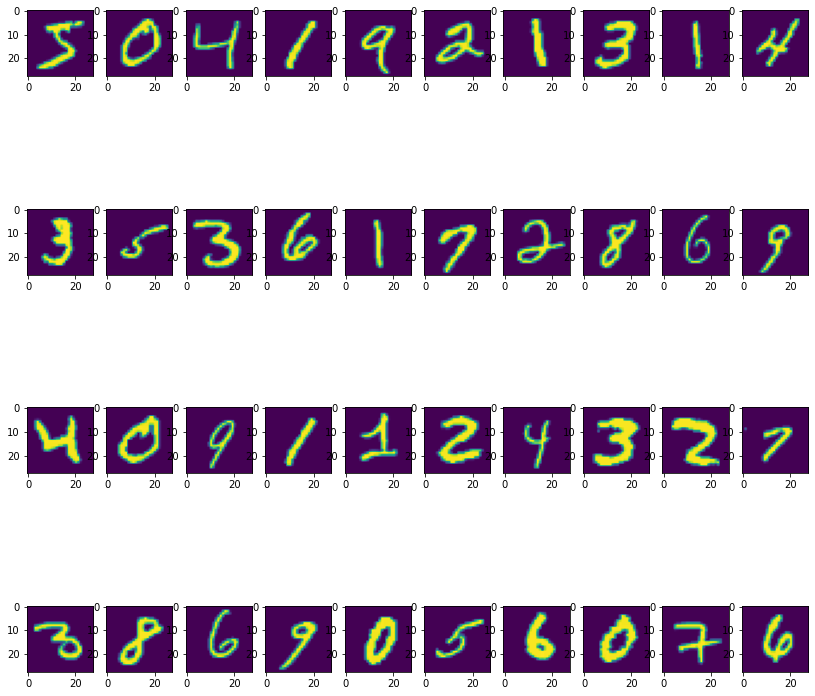

In [ ]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

### Yapılandırma Ayarları

In [ ]:
batch_size = 128 # Küme Boyutu
num_classes = 10 # Sınıf Sayısı
epochs = 20 # Eğitimin epoch sayısı
w_l2 = 1e-5 # Başlangıç

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, verbose=0,
    mode='auto', min_delta=0.0001, cooldown=0, min_lr=w_l2
)

In [ ]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# sınıf vektörlerini ikili sınıf matrislerine dönüştürmek
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Sigmoid Fonksiyonu 

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0

### Modelin Eğitilm ve Test Sonuçları 


In [ ]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 52s 13ms/step - loss: 0.8522 - accuracy: 0.7659 - val_loss: 1.4147 - val_accuracy: 0.4073
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.2229 - accuracy: 0.9462 - val_loss: 0.1654 - val_accuracy: 0.9514
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1472 - accuracy: 0.9621 - val_loss: 0.1074 - val_accuracy: 0.9694
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1216 - accuracy: 0.9680 - val_loss: 0.0832 - val_accuracy: 0.9771
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.1064 - accuracy: 0.9733 - val_loss: 0.0897 - val_accuracy: 0.9750
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0947 - accuracy: 0.9771 - val_loss: 0.0638 - val_accuracy: 0.9848
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0918 - accuracy: 0.9782 - val_loss: 0.0596 - val_accuracy: 0.987

### Hiperbolik Tanjant Fonksiyonu

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_4 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)       

### Modelin Eğitilm ve Test Sonuçları 

In [ ]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 0.3530 - accuracy: 0.8956 - val_loss: 0.0952 - val_accuracy: 0.9702
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0870 - accuracy: 0.9759 - val_loss: 0.0544 - val_accuracy: 0.9849
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0684 - accuracy: 0.9813 - val_loss: 0.0533 - val_accuracy: 0.9841
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0590 - accuracy: 0.9846 - val_loss: 0.0980 - val_accuracy: 0.9729
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0576 - accuracy: 0.9856 - val_loss: 0.0591 - val_accuracy: 0.9842
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0525 - accuracy: 0.9868 - val_loss: 0.0592 - val_accuracy: 0.9848
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0493 - accuracy: 0.9891 - val_loss: 0.0608 - val_accuracy: 0.9848

### ReLU Fonksiyonu

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_7 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)       

### Modelin Eğitilm ve Test Sonuçları 


In [ ]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 7s 12ms/step - loss: 0.3383 - accuracy: 0.9040 - val_loss: 0.2998 - val_accuracy: 0.9146
Epoch 2/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0784 - accuracy: 0.9791 - val_loss: 0.0549 - val_accuracy: 0.9850
Epoch 3/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0645 - accuracy: 0.9834 - val_loss: 0.0452 - val_accuracy: 0.9876
Epoch 4/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0547 - accuracy: 0.9859 - val_loss: 0.0419 - val_accuracy: 0.9897
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0514 - accuracy: 0.9874 - val_loss: 0.0386 - val_accuracy: 0.9916
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0484 - accuracy: 0.9896 - val_loss: 0.0431 - val_accuracy: 0.9909
Epoch 7/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0454 - accuracy: 0.9903 - val_loss: 0.0469 - val_accuracy: 0.9894

### Leaky (Sızıntı) ReLU Fonksiyonu
Bu fonksiyon keras içinde [advanced activation function](https://keras.io/layers/advanced-activations/) olarak tanımlıdır bu yüzen bu fonksiyonu import edip model içinde kullanmamız gerekir.

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_9 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dense_6 (Dense)              (None, 24, 24, 64)        4160      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 24, 24, 64)       

### Modelin Eğitilm ve Test Sonuçları 


In [ ]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 8s 14ms/step - loss: 0.3534 - accuracy: 0.8919 - val_loss: 0.2515 - val_accuracy: 0.9226
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0857 - accuracy: 0.9760 - val_loss: 0.0473 - val_accuracy: 0.9873
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0668 - accuracy: 0.9814 - val_loss: 0.0499 - val_accuracy: 0.9864
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0573 - accuracy: 0.9850 - val_loss: 0.0516 - val_accuracy: 0.9872
Epoch 5/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0507 - accuracy: 0.9876 - val_loss: 0.0531 - val_accuracy: 0.9867
Epoch 6/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0502 - accuracy: 0.9874 - val_loss: 0.0486 - val_accuracy: 0.9888
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0490 - accuracy: 0.9875 - val_loss: 0.0557 - val_accuracy: 0.9861

### Swish Aktivasyon Fonksiyonunun Tanımlanması

In [ ]:
def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_14 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_11 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_15 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_12 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)       

### Modelin Eğitilm ve Test Sonuçları 
Histogram tanımlaması

In [ ]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
469/469 [==============================] - 8s 13ms/step - loss: 0.3088 - accuracy: 0.9145 - val_loss: 0.0609 - val_accuracy: 0.9832
Epoch 2/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0731 - accuracy: 0.9812 - val_loss: 0.0472 - val_accuracy: 0.9879
Epoch 3/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0546 - accuracy: 0.9862 - val_loss: 0.0510 - val_accuracy: 0.9861
Epoch 4/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0492 - accuracy: 0.9888 - val_loss: 0.0457 - val_accuracy: 0.9890
Epoch 5/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0443 - accuracy: 0.9901 - val_loss: 0.0446 - val_accuracy: 0.9897
Epoch 6/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0407 - accuracy: 0.9914 - val_loss: 0.0459 - val_accuracy: 0.9895
Epoch 7/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0360 - accuracy: 0.9936 - val_loss: 0.0488 - val_accuracy: 0.9897

In [ ]:
hist_swish.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [ ]:
import pandas as pd
df=pd.DataFrame(hist_swish.history)
df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.164775,0.955983,0.060880,0.9832,0.00100
1,0.070353,0.981767,0.047237,0.9879,0.00100
2,0.057199,0.985517,0.051008,0.9861,0.00100
3,0.049197,0.988400,0.045700,0.9890,0.00100
4,0.045002,0.989967,0.044620,0.9897,0.00100
5,0.040882,0.991650,0.045932,0.9895,0.00100
6,0.038593,0.992833,0.048814,0.9897,0.00100
7,0.038682,0.993033,0.050308,0.9892,0.00100
8,0.038376,0.993317,0.049000,0.9913,0.00100
9,0.039453,0.993833,0.049717,0.9905,0.00100


## Kaydedilen sonuçların çizilmesi için plot fonksiyonunun tanımlanması

In [ ]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'loss': 'loss', 'accu': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_accuracy': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[4:8]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'Swish'], loc=loc)  
    plt.grid()
    plt.show()

In [ ]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]

## SONUÇLARIN KARŞILAŞTIRILMASI

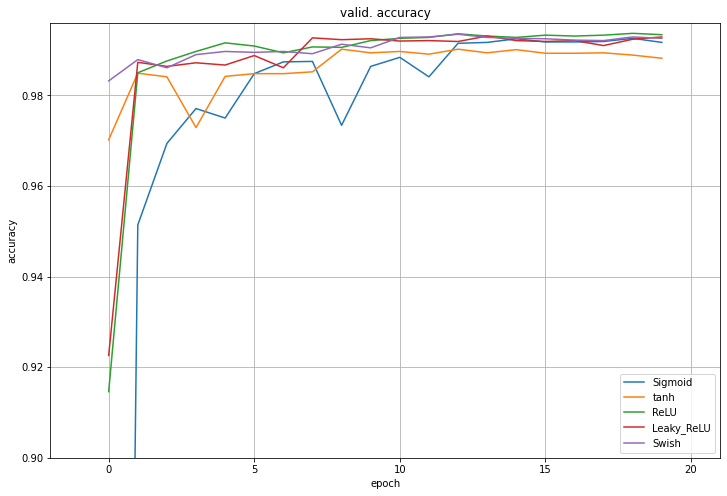

In [ ]:
plot_history(hists, attribute="val_accuracy",axis=(-2,21,0.90,0.9960), loc='lower right')

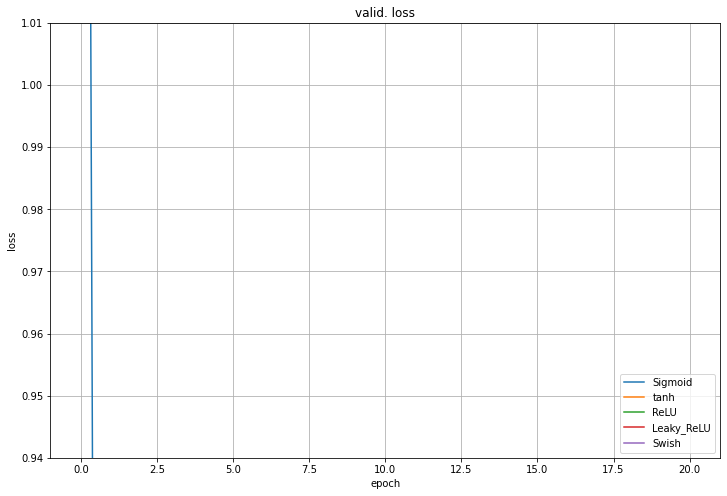

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.94,1.01), loc='lower right')

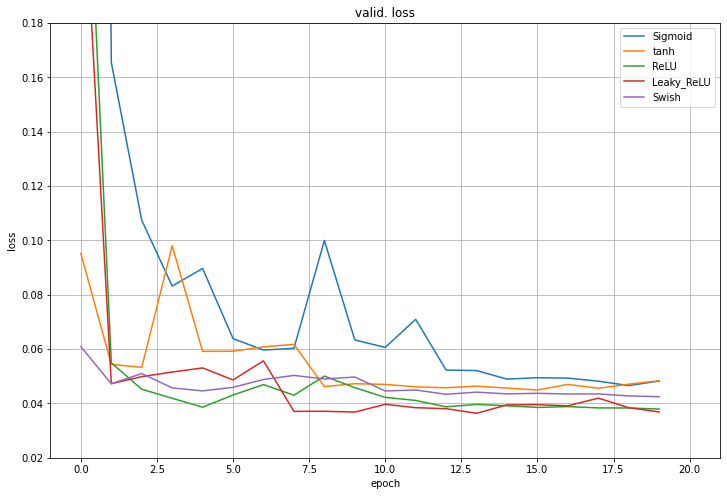

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.02,0.18), loc='upper right')

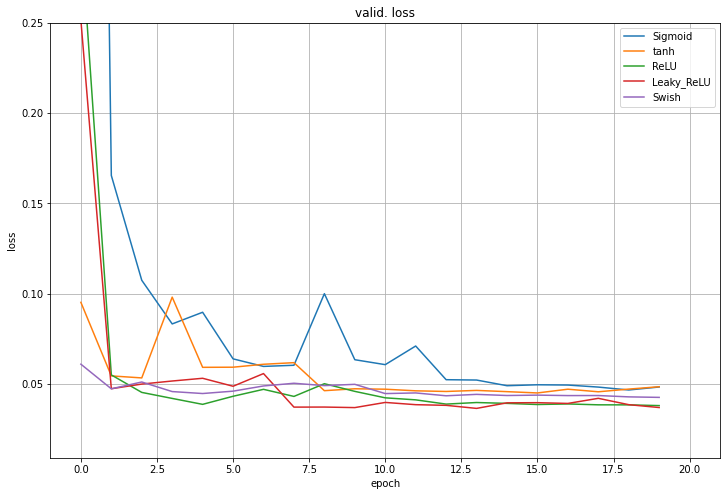

In [ ]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.009,0.25), loc='upper right')